In [1]:
%pylab inline
#plt.style.use('_background')
#pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Trajectory functions
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

In [3]:
# Plotting functions
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

In [34]:
##### Requirements for the trajectory
# Waypoints
p1 = [-5,-7]
p2 = [10,-7]
p3 = [10,-2]
p4 = [3,-2]
p5 = [3,1]
p6 = [3,6]
p7 = [0,6]
p8 = [0,1]
p9 = [3,1]
p10 = [3,10]
p11 = [9,10]

# Velocities
# v1 = [0,-0.001]
# v2 = [0,1]
# v3 = [1,0]
# v4 = [-1,1]
# v5 = [0,-0.001]
# v6 = [0,-0.001]
# v7 = [-1,1]
# v8 = [1,0]
# v9 = [-1,1]
# v010 = [0,-0.001]


v1 = [0,0]
v2 = [0,1]
v3 = [-1,0]
v4 = [0,1]
v5 = [0,1]
v6 = [-1,0]
v7 = [0,-1]
v8 = [1,0]
v9 = [0,1]
v10 = [1,0]
v11 =[0,0]


# Time
t1 = 0
t2 = 12
t3 = 22
t4 = 32
t5 = 42
t6 = 47
t7 = 62
t8 = 72
t9= 90
t10 = 92
t11 = 110

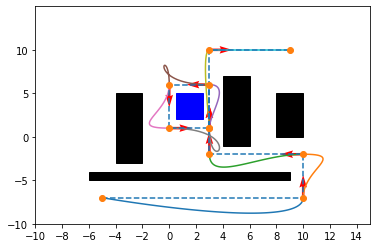

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor('white')

rect1 = matplotlib.patches.Rectangle((4, -1.0), 
                                     2, 8, 
                                     color ='black') 
  
rect2 = matplotlib.patches.Rectangle((0.5, 2.0), 
                                     2, 3, 
                                     color ='blue') 
  
rect3 = matplotlib.patches.Rectangle((-6, -5), 
                                     15, 1, 
                                     color ='black') 

rect4 = matplotlib.patches.Rectangle((8, 0), 
                                     2, 5, 
                                     color ='black')

rect5 = matplotlib.patches.Rectangle((-4, -3), 
                                     2, 8, 
                                     color ='black')
  
ax.add_patch(rect1) 
ax.add_patch(rect2) 
ax.add_patch(rect3) 
ax.add_patch(rect4)
ax.add_patch(rect5)

plt.xlim([-10, 15]) 
plt.ylim([-10, 15]) 

my_x_ticks = np.arange(-10, 15, 2)
my_y_ticks = np.arange(-10, 15, 5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5,p6,p7,p8,p9,p10,p11))
V = np.vstack((v1, v2, v3, v4, v5,v6,v7,v8,v9,v10,v11))
T = [t1, t2, t3, t4, t5,t6,t7,t8,t9,t10,t11]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plot the trajectory that passes trhough the desired waypoints
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)
plot_points()
    
plt.show()

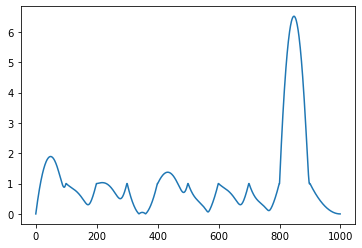

In [36]:
# Plot speed
plot_speed()